In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def generate_reserve_prices(n):
    reserve_prices = np.linspace(0, 1, 100)
    normalized_reserve_prices = reserve_prices / reserve_prices.sum()
    return (np.random.choice(reserve_prices, n, p=normalized_reserve_prices) * 100) + 900

def simulate_auction(n, first_bid, second_bid):
    reserve_prices = generate_reserve_prices(n)
    n_first_bid_wins = (first_bid > reserve_prices).sum()
    first_bid_spending = n_first_bid_wins * first_bid
    reserve_prices_after_first_bid = reserve_prices[first_bid < reserve_prices]
    n_second_bid_wins = (second_bid > reserve_prices_after_first_bid).sum()
    second_bid_spending = n_second_bid_wins * second_bid
    return ((n_first_bid_wins + n_second_bid_wins) * 1000) - (first_bid_spending + second_bid_spending)

In [4]:
def find_optimal_bids(n, runs_per_combination=10):
    max_profit = -1
    optimal_bids = None
    for first_bid in (np.arange(900, 1000, 1)):
        for second_bid in np.arange(first_bid, 1000, 1):
            for _ in range(runs_per_combination):
                profit = simulate_auction(n, first_bid, second_bid)
                if profit > max_profit:
                    max_profit = profit
                    optimal_bids = (first_bid, second_bid)
    return optimal_bids, max_profit

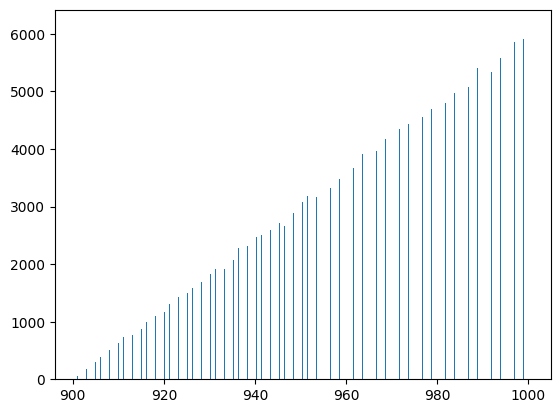

In [5]:
prices = generate_reserve_prices(300000)
#plot
plt.hist(prices, bins=1000)
plt.show()

In [6]:
def generate_second_bids(n, n_sims):
    second_prices = []
    for i in tqdm(range(n)):
        _, second_price = find_optimal_bids(n_sims)
        second_prices.append(second_price)
    second_prices = np.array(second_prices)
    return second_prices
        

def simulate_auction_round_four(n, first_bid, second_bid, avg_second_bid = 978):
    reserve_prices = generate_reserve_prices(n)
    n_first_bid_wins = (first_bid > reserve_prices).sum()
    first_bid_spending = n_first_bid_wins * first_bid
    first_bid_profit = n_first_bid_wins * 1000 - first_bid_spending  
    reserve_prices_after_first_bid = reserve_prices[first_bid < reserve_prices] # same setup in bid round 1
    p = (1000 - avg_second_bid) / (1000 - second_bid) # this scaling factor p only depends on the constant round two avg. and our second bid, so is also constant in an auction
    n_second_bid_wins = (second_bid > reserve_prices_after_first_bid).sum()
    second_bid_spending = n_second_bid_wins * second_bid
    if second_bid > avg_second_bid:
        p = 1
    second_bid_profit = (n_second_bid_wins * 1000 - second_bid_spending) * p # meaning we can scale our entire profit by this scaling factor p
    total_profit = first_bid_profit + second_bid_profit
    return total_profit

In [7]:
def find_optimal_bids_round_four(n, avg_second_bid, runs_per_combination=1):
    max_profit = -1
    optimal_bids = None
    for first_bid in tqdm(np.arange(900, 1000, 1)):
        for second_bid in np.arange(first_bid, 1000, 1):
            for _ in range(runs_per_combination):
                profit = simulate_auction_round_four(n, first_bid, second_bid, avg_second_bid)
                if profit > max_profit:
                    max_profit = profit
                    optimal_bids = (first_bid, second_bid)
    return optimal_bids, max_profit

n = 10000
for i in range(975, 985):
    avg_price_strats = {}
    optimal_bids, max_profit = find_optimal_bids_round_four(n, i, runs_per_combination=20)
    print(f"For price {i} : Optimal bids: {optimal_bids}, Max profit: {max_profit}")
    avg_price_strats[i] = optimal_bids

100%|██████████| 100/100 [01:38<00:00,  1.02it/s]


For price 975 : Optimal bids: (954, 980), Max profit: 209342


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


For price 976 : Optimal bids: (955, 978), Max profit: 208379


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


For price 977 : Optimal bids: (953, 979), Max profit: 209488


100%|██████████| 100/100 [01:45<00:00,  1.06s/it]


For price 978 : Optimal bids: (953, 978), Max profit: 207852.0


100%|██████████| 100/100 [01:45<00:00,  1.06s/it]


For price 979 : Optimal bids: (955, 981), Max profit: 209735


100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


For price 980 : Optimal bids: (952, 980), Max profit: 208908.0


100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


For price 981 : Optimal bids: (956, 982), Max profit: 208038


100%|██████████| 100/100 [01:43<00:00,  1.04s/it]


For price 982 : Optimal bids: (954, 982), Max profit: 206962.0


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


For price 983 : Optimal bids: (956, 983), Max profit: 206182.0


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]

For price 984 : Optimal bids: (958, 984), Max profit: 203124.0


In [8]:
for i in range(985, 1000):
    avg_price_strats = {}
    optimal_bids, max_profit = find_optimal_bids_round_four(n, i, runs_per_combination=20)
    print(f"For price {i} : Optimal bids: {optimal_bids}, Max profit: {max_profit}")
    avg_price_strats[i] = optimal_bids

100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


For price 985 : Optimal bids: (958, 985), Max profit: 204261.0


100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


For price 986 : Optimal bids: (957, 986), Max profit: 200454.0


100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


For price 987 : Optimal bids: (956, 987), Max profit: 199190.0


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


For price 988 : Optimal bids: (957, 988), Max profit: 197841.0


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


For price 989 : Optimal bids: (958, 989), Max profit: 195749.0


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


For price 990 : Optimal bids: (961, 990), Max profit: 192433.0


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


For price 991 : Optimal bids: (961, 991), Max profit: 189276.0


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]


For price 992 : Optimal bids: (961, 992), Max profit: 188240.0


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


For price 993 : Optimal bids: (961, 993), Max profit: 183403.0


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]


For price 994 : Optimal bids: (964, 994), Max profit: 178860.0


100%|██████████| 100/100 [01:36<00:00,  1.03it/s]


For price 995 : Optimal bids: (964, 995), Max profit: 176157.0


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


For price 996 : Optimal bids: (964, 996), Max profit: 170468.0


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


For price 997 : Optimal bids: (961, 996), Max profit: 166812.0


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


For price 998 : Optimal bids: (965, 998), Max profit: 162644.0


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]

For price 999 : Optimal bids: (965, 997), Max profit: 157836.0
